In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data-27 (1).csv')
df.head()

,datetime,open,high,low,close,volume,Unnamed: 0.1,Unnamed: 0
0,2018-01-01 00:00:00,13715.65,13818.55,12750.00,13135.00,6970.441076,NaN,NaN
1,2018-01-02 00:00:00,13135.00,14750.00,12890.02,14580.00,16359.347340,NaN,NaN
2,2018-01-03 00:00:00,14576.87,15473.49,14150.00,14749.97,19457.238601,NaN,NaN
3,2018-01-04 00:00:00,14710.00,15280.00,13918.04,14811.00,18783.876561,NaN,NaN
4,2018-01-05 00:00:00,14805.01,17118.13,14600.00,16579.00,22383.657333,NaN,NaN


In [5]:
df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
print("\nData Info:")
print(df.info())
print("\nSummary Stats:\n", df.describe())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  2924 non-null   datetime64[ns]
 1   open      2924 non-null   float64       
 2   high      2924 non-null   float64       
 3   low       2924 non-null   float64       
 4   close     2924 non-null   float64       
 5   volume    2924 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 137.2 KB
None

Summary Stats:
                   datetime          open          high           low  \
count                 2924   2924.000000   2924.000000   2924.000000   
mean   2020-07-01 20:45:00  18155.724839  18623.465082  17641.735393   
min    2018-01-01 00:00:00   3183.900000   3281.870000   3156.260000   
25%    2019-01-01 00:00:00   7202.790000   7408.750000   7017.480000   
50%    2020-01-01 02:45:00  10191.480000  10445.000000   9890.000000   

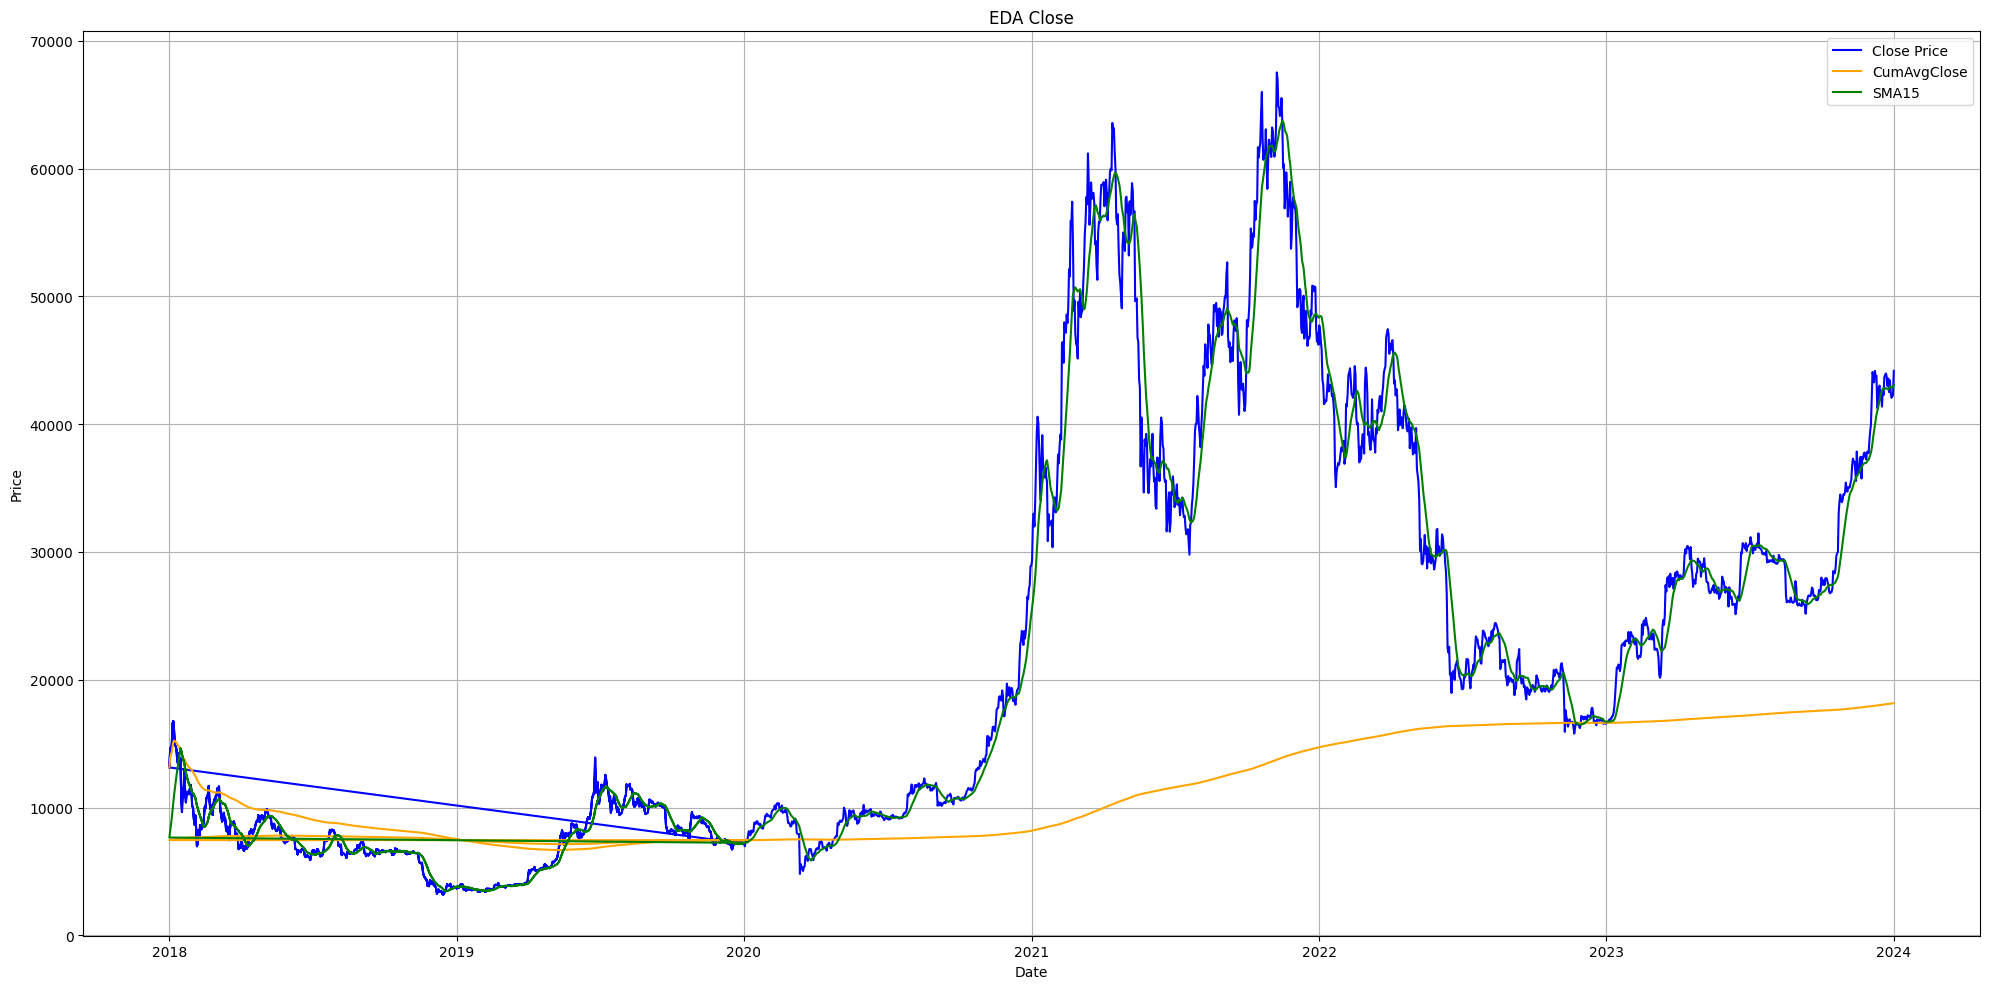

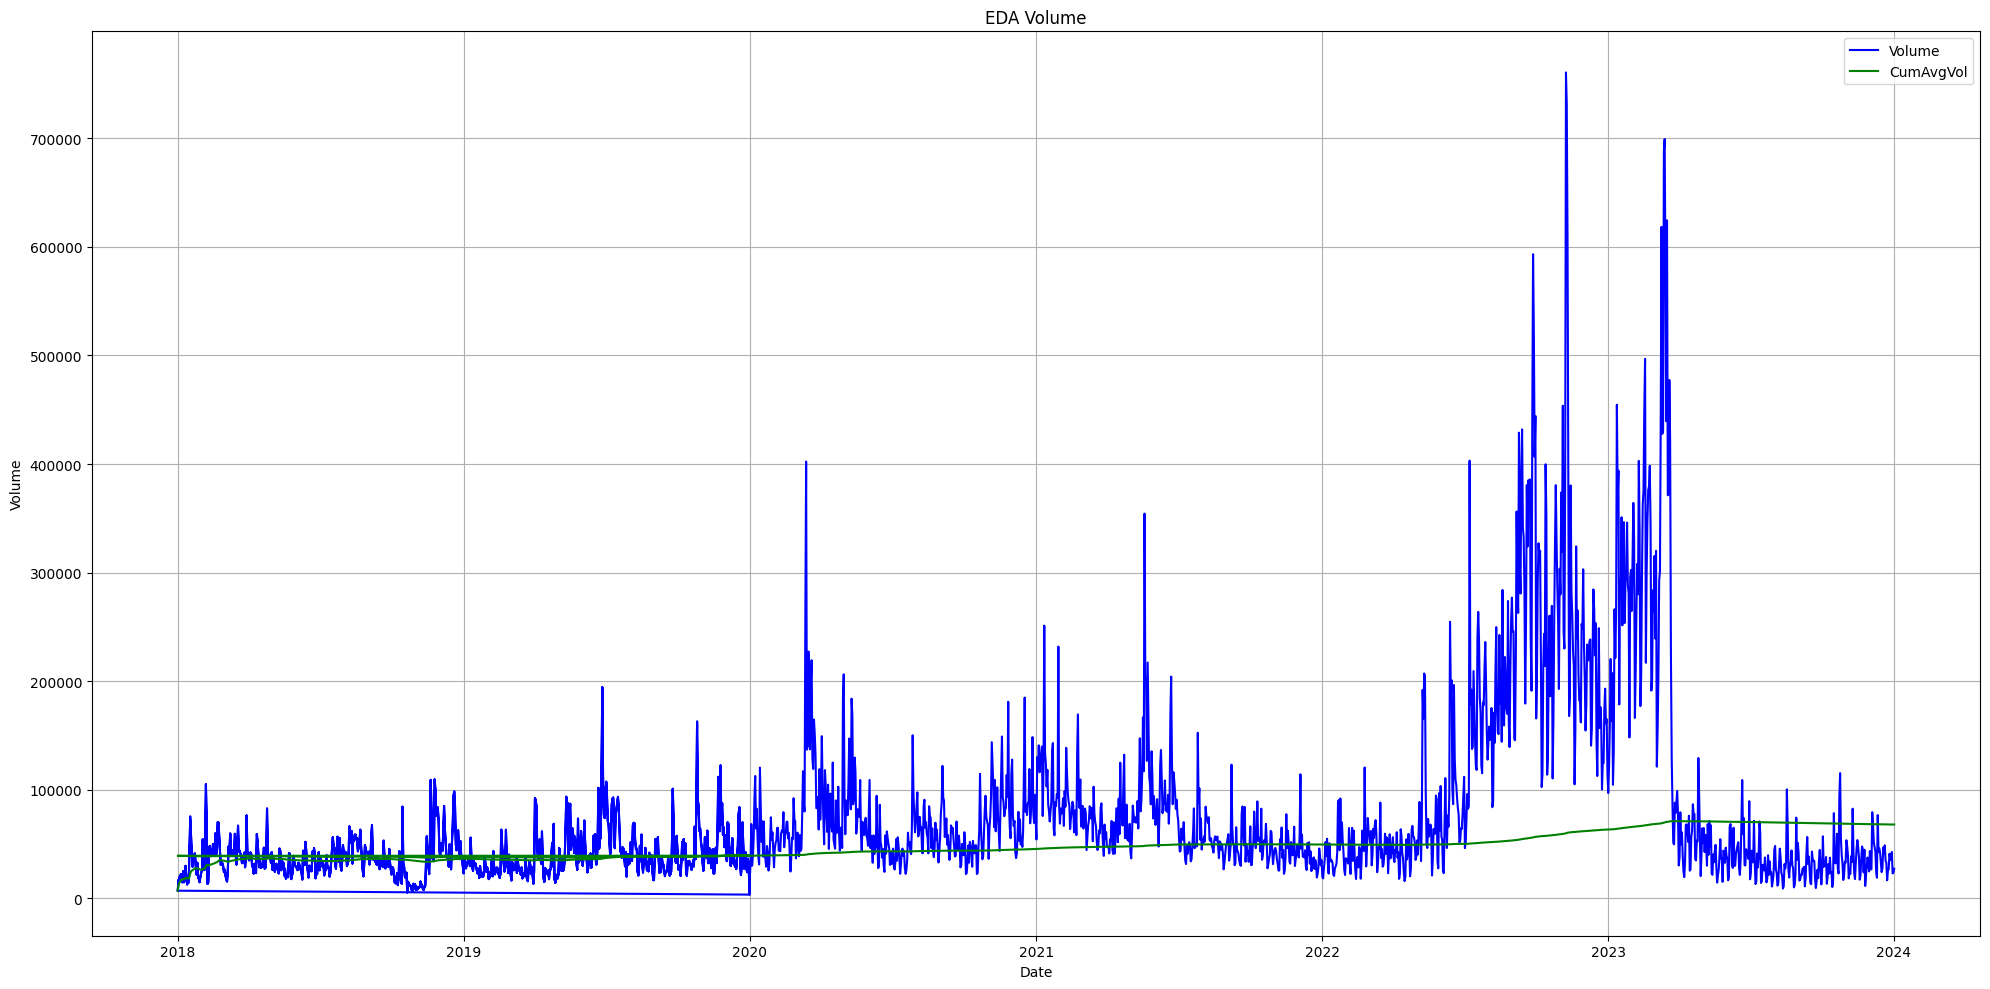

In [7]:
df['cum_avg_close'] = df['close'].expanding().mean()
df['SMA_15'] = df['close'].rolling(window=15).mean()

plt.figure(figsize=(20, 10))
plt.plot(df['datetime'], df['close'], label='Close Price', color='blue')
plt.plot(df['datetime'], df['cum_avg_close'], label='CumAvgClose', color='orange')
plt.plot(df['datetime'], df['SMA_15'], label='SMA15', color='green')
plt.title('EDA Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df['cum_avg_vol'] = df['volume'].expanding().mean()
plt.figure(figsize=(20, 10))
plt.plot(df['datetime'], df['volume'], label='Volume', color='blue')
plt.plot(df['datetime'], df['cum_avg_vol'], label='CumAvgVol', color='green')
plt.title('EDA Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
df['SMA'] = df['close'].rolling(window=20).mean()
df['EMA_20'] = df['close'].ewm(span=20, adjust=False).mean()
df['EMA_50'] = df['close'].ewm(span=50, adjust=False).mean()

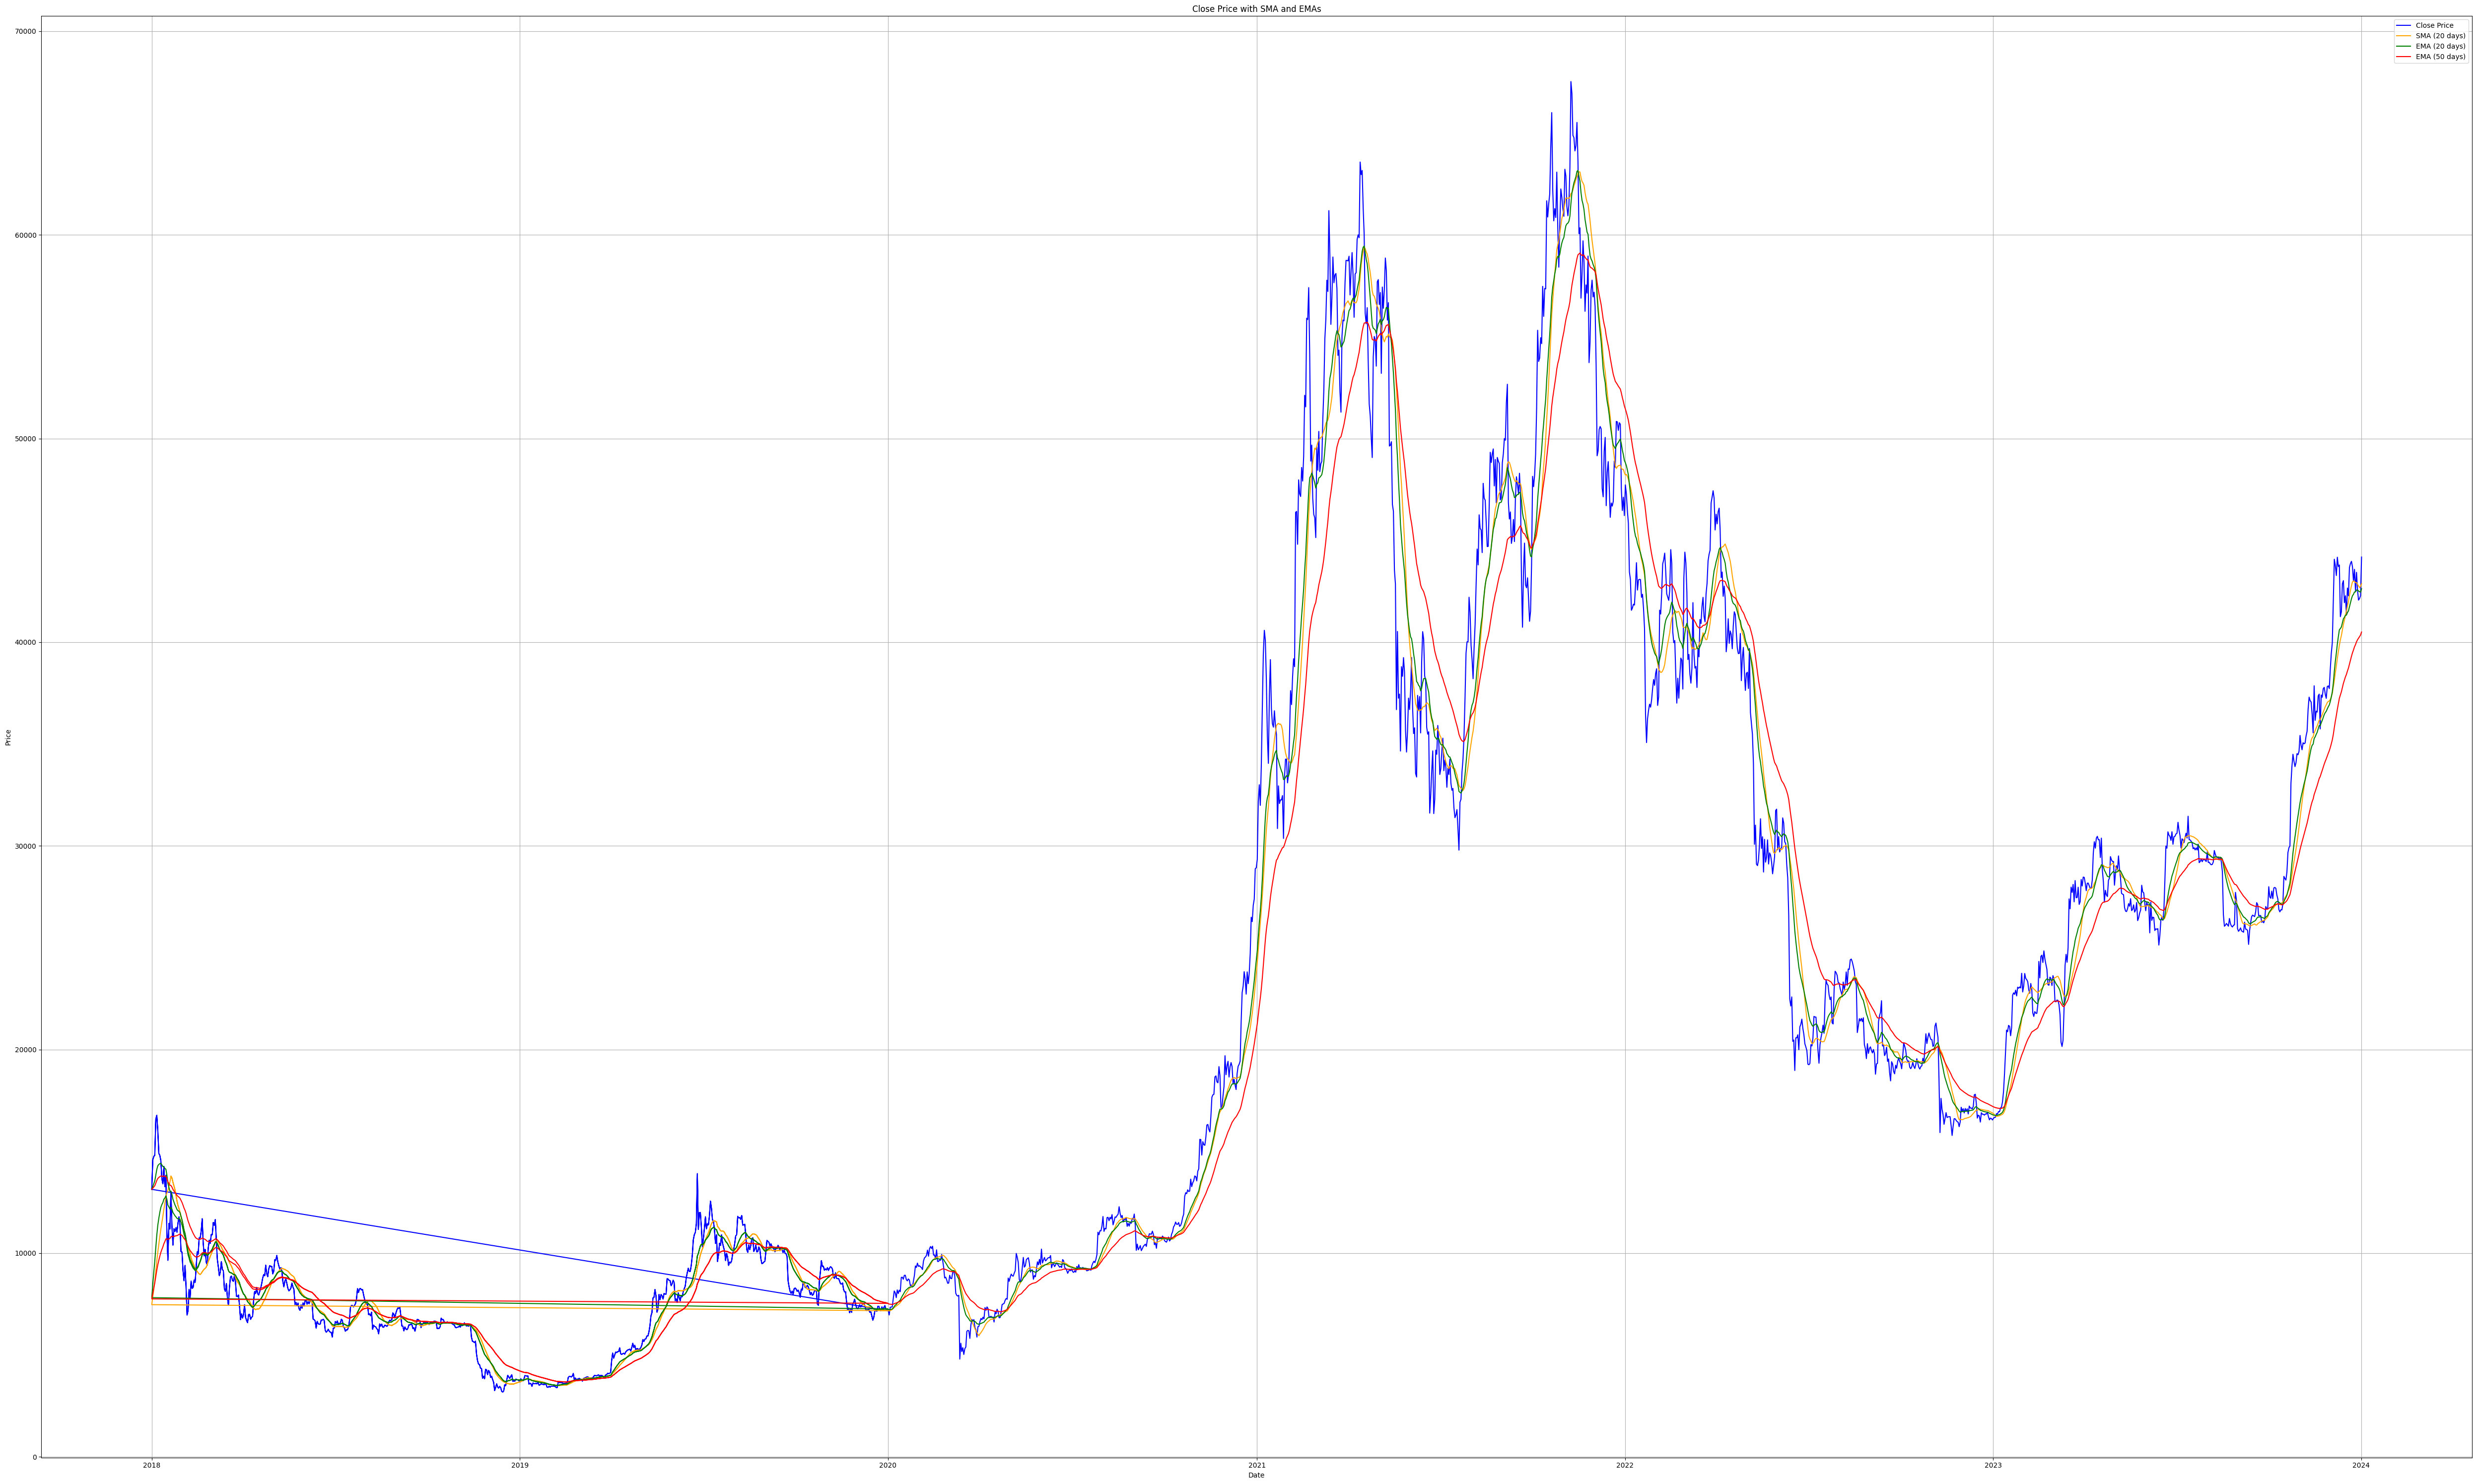

In [9]:
plt.figure(figsize=(50, 30))
plt.plot(df['datetime'], df['close'], label='Close Price', color='blue')
plt.plot(df['datetime'], df['SMA'], label='SMA (20 days)', color='orange')
plt.plot(df['datetime'], df['EMA_20'], label='EMA (20 days)', color='green')
plt.plot(df['datetime'], df['EMA_50'], label='EMA (50 days)', color='red')
plt.title('Close Price with SMA and EMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
df.set_index('datetime', inplace=True)
Std_Dev = df['close'].resample('6ME').std()

print("Standard deviation for each 6-month period:")
print(Std_Dev)

most_volatile_period = Std_Dev.idxmax()
highest_std = Std_Dev.max()
print(f"\nMost volatile 6-month period: {most_volatile_period.strftime('%Y-%m')}")
print(f"Standard deviation during this period: {highest_std:.2f}")

Standard deviation for each 6-month period:
datetime
2018-01-31     2015.271600
2018-07-31     1328.840791
2019-01-31     1407.786648
2019-07-31     2798.572026
2020-01-31     1312.245827
2020-07-31     1372.755043
2021-01-31     8741.749329
2021-07-31    10029.363786
2022-01-31     7837.139102
2022-07-31     8890.239310
2023-01-31     2336.555334
2023-07-31     2736.763731
2024-01-31     6386.320742
Freq: 6ME, Name: close, dtype: float64

Most volatile 6-month period: 2021-07
Standard deviation during this period: 10029.36
